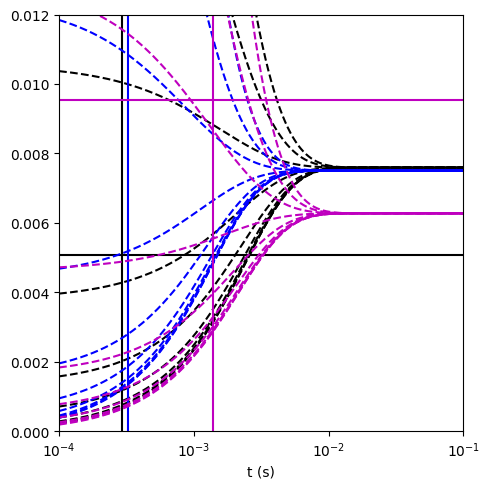

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, NullLocator

# Define line styles, colors, and font sizes
line_arr = ('-', '--', '-.', ':')
color_arr = ('k', 'b', 'm', 'y', 'g', 'c')
label_size = 10
font_size = 10
tick_size = 10

# Define the list of directories containing the CSV files (converted to a sorted list)
data_dir_list = sorted({
    "../../data/case_NH3_0D/ILDM/T_1989",
    "../../data/case_NH3_0D/ILDM/T_2633",
    "../../data/case_NH3_0D/ILDM/T_2701",
    

    })

original_data_path = "../../data/case_NH3_0D/N_HR_3.csv"
df = pd.read_csv(original_data_path)
location_list = [1083, 1644,2135]


time_denote_list = [5.4e-5, 0.0002840359832162628, 0.001339413841950313] 

NO_denote_list = []
# Create a figure with 1 subplot since we only want to plot NO (or NO2 if added)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Define the species to plot and text positions
species_to_plot = ['NO']
text_positions = {
    'NO': (2e-2, 3e-5),
    'NO2': (9e-3, 3e-6)
}

fig_name = "figs/CEQ/ILDM_combined.pdf"

# Iterate over each directory in the list
for idx, data_dir in enumerate(data_dir_list):
    # Use df_ref (the reference data) to extract values for this condition
    row = df.iloc[location_list[idx]]  # for example, row for 1500K, 2000K, etc.
    deteno_time = row['t']
    denote_NO = row['NO']
    
    # Choose a unique color for this directory
    current_color = color_arr[idx % len(color_arr)]
    
    # Iterate over CSV files in the current directory
    for filename in os.listdir(data_dir):
        if filename.endswith(".csv"):
            file_path = os.path.join(data_dir, filename)
            species_name = filename.split('_')[0]
            # Only plot if the species is in species_to_plot
            if species_name in species_to_plot:
                # Use a different variable (df_species) for these CSVs so df_ref is not overwritten
                df_species = pd.read_csv(file_path)
                label_text = f'{species_name} - {os.path.basename(data_dir)}'
                # Note: these CSV files are assumed to have a "Time" column
                ax.plot(df_species['Time'], df_species[species_name],
                        label=label_text,
                        linestyle="--",
                        color=current_color)

    
    # Add vertical and horizontal lines for the reference values (for each condition)
    ax.axvline(x=deteno_time, color=current_color, linestyle='-')
    ax.axhline(y=denote_NO, color=current_color, linestyle='-')



# Customize the subplot with logarithmic scales and axis limits
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('t (s)', fontsize=font_size)
ax.set_xlim([1e-4, 1e-1])
ax.set_ylim([0, 1.2e-2])
ax.xaxis.set_major_locator(LogLocator(base=10.0, numticks=3))
# ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=3))
ax.xaxis.set_minor_locator(NullLocator())
# ax.yaxis.set_minor_locator(NullLocator())
ax.tick_params(axis='both', which='major', labelsize=tick_size)

plt.tight_layout()
plt.show()
# Uncomment the next line to save the figure
# plt.savefig(fig_name, dpi=300, bbox_inches='tight')